# Face Recognition Project

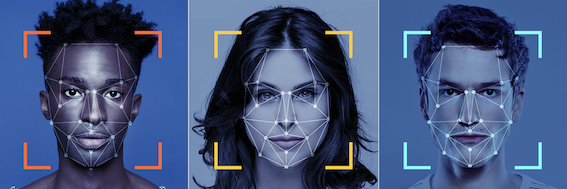

В этом проекте мы погрузимся во фреймворк распознавания лиц и обучим нейронную сеть задаче распознавания лиц,
поиграемся с потерями и метриками.
Мы будем обучать нейронную сеть на [наборе данных CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

Как мы видим на сайте, изображения набора данных celebA выглядят так:


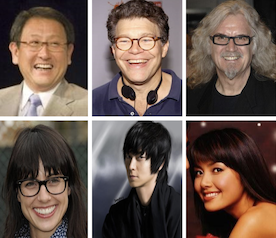

Но мы не будем обучать нейронную сеть распознаванию лиц на этих изображениях. Сначала нам нужно их предварительно обработать. Давайте посмотрим, зачем нам это нужно и как нам нужно их предварительно обработать.

Давайте посмотрим, как работают системы распознавания лиц:

## Обучение модели распознавания лиц и настройка логического вывода

В этом разделе описывается, как обучаются модели распознавания лиц, что такое выравнивание данных и как выглядит вывод модели распознавания лиц. Если вы знакомы с этим, вы можете пропустить этот раздел.

### Обучение модели

Чтобы обучить модель распознавания лиц на любом наборе данных лиц, изображения должны быть сначала выровнены. Этот шаг очень важен для достижения хорошего качества распознавания лиц.

Что такое выравнивание: оно состоит из трех шагов:
1. По заданному изображению определить ориентиры лица на изображении (координаты точек глаз, носа и рта). Здесь можно использовать отдельную нейросеть, обученную распознавать ориентиры на изображениях лица. Вы можете обратиться к [учебнику PyTorch Landmarks](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html), чтобы узнать, как это работает.
2. Поверните все изображения в наборе данных так, чтобы глаза человека на каждом изображении лежали на определенной заранее определенной горизонтальной линии.
3. Масштабируйте все изображения в наборе данных так, чтобы размеры лиц были примерно одинаковыми.

Вот пример того, что мы получим после выравнивания всех изображений Аарона Пирсола из нашего набора данных:

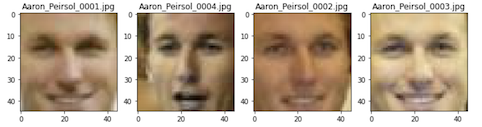

Вы видите, что глаза всех лиц лежат на одной горизонтальной линии и все лица имеют почти одинаковый размер. Если мы выровняем все изображения в наборе данных, мы сможем обучить нейронную сеть на выровненных изображениях.

**Зачем нужна процедура выравнивания**: выравнивание всех лиц в наборе данных упрощает задачу распознавания лиц для модели. Если все лица, которые видит модель, имеют одинаковый размер и имеют свои ориентиры (глаза, нос и т. д.) почти на одних и тех же участках изображения, модели легче научиться распознавать человека на изображении. Модель не должна «искать» положение лица и глаз на изображении перед распознаванием.

Если вам интересно, вы также можете обучить модель на невыровненных изображениях, но вы увидите, что она будет работать плохо. Хотя можно обучить модель распознаванию лиц без предварительного выравнивания всех лиц, но для этого потребуется огромное количество данных — больше, чем есть почти у любой компании. Единственная компания, которая открыто представила свою систему распознавания лиц, не требующую специального выравнивания, — это Facebook — их нейронная сеть была обучена на действительно огромном количестве данных с помощью специального трюка, позволяющего избежать выравнивания. Вы можете прочитать более подробную информацию [здесь](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Вывод модели

Итак, давайте посмотрим, как модель, обученная на выровненных лицах, может использоваться в реальном мире:

Предположим, вы должны компании и хотите построить систему распознавания лиц для своего рабочего офиса. Вы решили развесить по офису несколько камер и хотите, чтобы они могли распознавать лица всех ваших сотрудников, когда они сидят/ходят по офису (предоставляем вам самим решать, зачем вам такая система в вашем офисе)


Система распознавания лиц обычно состоит из 3 этапов:
- обнаружение лица
- выравнивание лица
- распознавание лица

Давайте обсудим их подробно:

**Распознавание лиц**

Когда камера висит на стене, она записывает видео и разбивает видео на отдельные изображения, например:

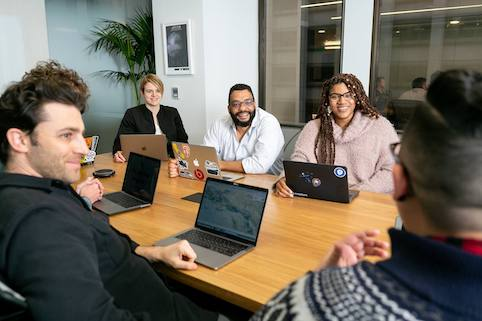

Чтобы иметь возможность распознавать все лица на фотографии, вам нужно сначала обнаружить все лица, присутствующие на фотографии, например:

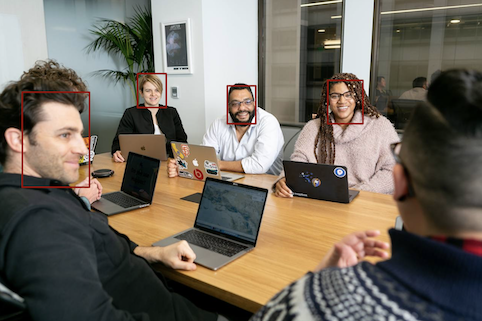

Это первая часть — обнаружение. Вы можете использовать для этого любую нейронную сеть, которая может обнаруживать людей.

**Выравнивание лица**

Второй этап заключается в выравнивании всех найденных граней. Процедура выравнивания здесь должна быть такой же, как и для выравнивания обучающих изображений.

Таким образом, мы получим изображение парня на фотографии, выровненное следующим образом:

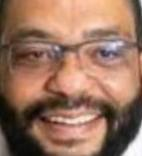

**Распознавание лица**

На третьем этапе мы используем нейронную сеть, которую мы обучили распознавать лицо.

Вот как работает конвейер моделей распознавания лиц. Вы также можете прочитать об этом подробнее на [ссылка](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (и с помощью поиска в интернете)

## Архитектура модели нейронной сети

Давайте обсудим, как должна выглядеть модель для распознавания лиц.



Самый простой и, на самом деле, наиболее часто используемый способ построения нейронной сети для распознавания лиц — построить ее как **простой классификатор**.

Предположим, у нас есть набор данных с фотографиями N разных людей. Затем мы можем построить нейронную сеть, чтобы классифицировать все изображения из набора данных по N классам. Каждый класс относится к одному уникальному человеку в наборе данных.

**Как тогда мы будем распознавать новых людей с помощью этой сети?** На самом деле мы хотим, чтобы сеть для распознавания лиц могла распознавать не только людей, которые находятся в обучающей выборке, но и почти каждого человека в мире.

Вот как: после обучения модели мы сбрасываем последний слой классификации. После этого, когда мы будем передавать изображение человека по сети, мы получим результат предпоследнего слоя — это **эмбеддинг изображения**. Имея вложения двух разных изображений, мы можем сравнить их, используя **косинусное расстояние**. Чем меньше расстояние — тем выше вероятность того, что эти две фотографии принадлежат одному человеку.

Используя эту технику, мы можем получить вложения каждого изображения — даже невидимых людей, сравнить их и выявить изображения, принадлежащие одним и тем же людям.

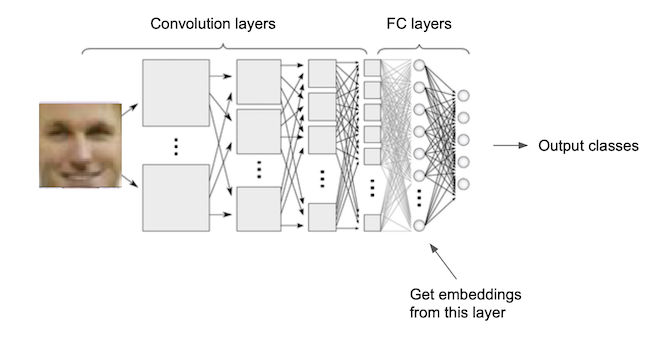

## Построим нейронную сеть для детекции лиц без использования примеров, описанных выше (это будет уже в следующем примере)

### Dataset 

Гатренируем нашу модель на наборе данных [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). Но мы будем использовать его версию, в которой все изображения выровнены и обрезаны. Скачать набор данных можно по этой ссылке: https://disk.yandex.ru/d/S8f03spLIA1wrw или с помощью кода ниже:

### Загрузим данные

### Установим недостающие модули

- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

### Импортируеим модули

In [1]:
import cv2
import gc
import itertools
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import timm
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import warnings

from collections import defaultdict
from PIL import Image
from pytorch_metric_learning import losses
from skimage import io, transform, data
from skimage.feature import Cascade
from skimage.io import imread
from torch import nn
from torch.optim import lr_scheduler, Adam
from torch.utils.data import Dataset
from torchmetrics.functional import pairwise_cosine_similarity
from tqdm import tqdm
from typing import Union

In [2]:
from IPython.display import clear_output
warnings.filterwarnings('ignore') 

### Функции, которые нам облегчат жизнь в этом проекте

In [3]:
def show_imgs(images_names: list) -> None:
    '''
    Функция показа фото из распакованного архива
    На вход: список фото
    На выходе: показ фото
    '''
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

In [4]:
def get_paths(dataset_type: str='train') -> np.array:
    '''
    Функция, которая возвращает список путей к изображениям для заданного типа параметров набора данных:
    На вход подается тип данных: один из 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_500/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_500/celebA_imgs/', filename))
    
    return np.array(images_paths)

In [5]:
def fit_epoch(
    model: Union[str,
    nn.Module],
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.optim,
    sheduler: torch.nn=None
) -> Union[np.array, float]:
    '''
    Функция обучения на эпохе
    На вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    На выходе: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train
    
    for i, batch in enumerate(train_loader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        optimizer.zero_grad()
        logits = model(X_batch.to(device))
        loss = loss_fn(logits, y_batch.to(device))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == y_batch)
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [6]:
def eval_epoch(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[np.array, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''    
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [7]:
def train(
    train_loader: torch.utils.data.DataLoader,
    val_loader: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.optim=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''        
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели
    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    # log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    # val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch(model, train_loader, criterion, opt, sheduler)
            # print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch(model, val_loader, criterion)
            history.append((epoch, train_loss, train_acc, val_loss, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            # tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
            #                                v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [ ]:
def evaluate(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[np.array, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():

            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [9]:
def get_embeddings(model: nn.Module, img_list: list) -> list:
    '''
    Функция получения эмбеддингов
    принимает на вход: модель, список картинок
    отдает: список эмбеддингов
    '''       
    batch_size = 1
    loader = torch.utils.data.DataLoader(img_list, batch_size=batch_size, shuffle=False)
    
    model.eval()
    
    for i, batch in enumerate(loader):
        
        with torch.no_grad():
            embeddings = model(batch.to(device))
            
    return embeddings.cpu()

In [10]:
def compute_embeddings(model: nn.Module, images_list: list, path: list) -> list:
    '''
    Функция получения эмбеддингов списка фото.
    На входе: модель, список фото, каталог с фото
    На выходе: список эмбеддингов фото
    '''
    model.eval()
    
    embeddings = []
    image_list = []
    
    for i in range(len(images_list)):
        img_name = images_list[i]
        image = Image.open(os.path.join(path, img_name))
        image = transform(image)
        image_list.append(image)

    image_torch = torch.stack(tuple(image_list))
    loader = torch.utils.data.DataLoader(image_torch, batch_size=batch_size, shuffle=False)
    
    for i, batch in tqdm(enumerate(loader), desc='Get embeddings'):
        with torch.no_grad():
            logits = model(batch.to(device))

            for x in range(len(logits)):
                embeddings.append(logits[x].tolist())
        
    return embeddings
    raise NotImplementedError  

In [11]:
def type_embeddings(dataset_type: type) -> Union[dict, list]:
    '''
      Функция получения словаря, ключем которого является метка класса, значеним имя файла с картинкой
      и списка имен файлов, соответствующий типу данных
      на вход принимает: тип данных
      на выходе: словарь, список имен файлов
    '''    
    images = get_paths(dataset_type=dataset_type)

    f = open('celebA_train_500/celebA_anno.txt', 'r')
    type_lines = f.readlines()
    f.close()
    type_lines = [x.strip().split() for x in type_lines]
    type_lines = {x:y for x, y in type_lines}
    type_img_names = [x.split('/')[2] for x in images]

    type_dict = defaultdict(list)
    for img_name, img_class in type_lines.items():
        if img_name in type_img_names:
            type_dict[img_class].append(img_name)
    return type_dict, type_img_names

In [12]:
def compute_cosine_query_pos(
    query_dict: dict,
    query_img_names: list,
    query_embeddings: list
) -> list:
    '''
    Функция подсчета косинусного сходства между положительными парами.
    На вхлод: словарь {наименование фото: класс изображения},
    список имен фото, список эмбеддингов.
    На выходе: список косинусного сходства
    '''
    cosine_query_pos = []

    for key, value in tqdm(query_dict.items(), desc = 'Progress'):
        if len(value) > 1:
            for subset in itertools.combinations(value, 2):
                idx_test = query_img_names.index(subset[0])
                idx_train = query_img_names.index(subset[1])
                test_embs = query_embeddings[idx_test]
                train_embs = query_embeddings[idx_train]
                pcs = np.dot(test_embs, train_embs)/(np.linalg.norm(test_embs)*np.linalg.norm(train_embs))
                cosine_query_pos.append(pcs)
        
    return cosine_query_pos

In [ ]:
def compute_cosine_query_neg(
    query_dict: dict,
    query_img_names: list,
    query_embeddings: list
) -> list:
    '''
    Функция подсчета косинусного сходства между отрицательными парами.
    На вхлод: словарь {наименование фото: класс изображения},
    список имен фото, список эмбеддингов.
    На выходе: список косинусного сходства
    '''
    cosine_query_neg = []
    subset_set = []
    for subset in itertools.combinations(query_dict.keys(), 2):
        subset_set.append(subset)
    for i in range(len(subset_set):
        for img_1 in range(len(query_dict[subset_set[i][0]])):
            for img_2 in range(len(query_dict[subset_set[i][1]])):
                idx_value_1 = query_img_names.index(query_dict[subset_set[i][0]][img_1])
                idx_value_2 = query_img_names.index(query_dict[subset_set[i][1]][img_2])
                value_1_embs = query_embeddings[idx_value_1]
                value_2_embs = query_embeddings[idx_value_2]
                pcs = np.dot(value_1_embs, value_2_embs)/(np.linalg.norm(value_1_embs)*np.linalg.norm(value_2_embs))
                cosine_query_neg.append(pcs)

    return cosine_query_neg

In [51]:
def compute_cosine_query_distractors(
    query_embeddings: list,
    distractors_embeddings: list
)-> list:
    '''
    Функция подсчета косинусного сходства между негативными парами и дистракторов
    На вход: список негативных пар, список эмбеддингов дистрактора.
    На выходе: косинусное сходство между ними
    '''
    cosine_query_distractors = []
    for i in range(len(query_embeddings):
        for j in range(len(distractors_embeddings)):
        # for j in tqdm(range(len(distractors_embeddings)), desc='distractors_embeddings', leave=False):
            pcs = np.dot(
                query_embeddings[i], distractors_embeddings[j]
            )/(
                np.linalg.norm(query_embeddings[i])*np.linalg.norm(distractors_embeddings[j])
            )
            cosine_query_distractors.append(pcs)
    return cosine_query_distractors

SyntaxError: invalid syntax (303416584.py, line 11)

In [15]:
def compute_ir(
    cosine_query_pos: list,
    cosine_query_neg: list,
    cosine_query_distractors: list,
    fpr: float=0.1
) -> Union[float, float]:
    '''
    Функция, вычисляющая качество идентификации,
    используя докомпьютерные косинусные сходства между парами при заданном fprю
    На вход:
        косинусное сходство между положительными парами,
        косинусное сходство между отрицательными парами,
        косинусное сходство между отрицательными парами и эмбеддингов дистрактора,
        частота ложных срабатываний, по которой можно вычислить TPR.
    На выходе: пороговое сходство, true positive rate
    '''
    n_fp = len(cosine_query_neg) + len(cosine_query_distractors)
    N = fpr * n_fp
    thr = sorted(cosine_query_neg + cosine_query_distractors, reverse=True)[round(N)]
    fpr = len([i for i, v in enumerate(cosine_query_pos) if v >= thr])
    tpr = fpr / len(cosine_query_pos)
    
    return thr, tpr

In [16]:
def custom_loss(
    distance_function: list,
    margin: float,
    swap: bool
) -> float:
    '''
    Функция получения сводного лосса по модели
    на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
    на выходе: сводный лосс
    '''
    loss1 = nn.TripletMarginWithDistanceLoss(distance_function=distance_function, margin=margin, swap=swap)
    loss2 = nn.CrossEntropyLoss()
    def helper(anchor_emb, pos_emb, neg_emb, logits, label):
        '''
          Функция лоссов по модели
          на вход принимает: эмбеддинги (якорь, позитивный и негативный) и конечный с линейного слоя
          на выходе: результат сводного лосса
        '''
        return loss1(anchor_emb, pos_emb, neg_emb) + loss2(logits, label)
    return helper

In [17]:
def fit_epoch_TripletLoss(
    model: nn.Module,
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.nn,
    sheduler: torch.nn=None
) -> Union[float, float]:
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    losses_cl = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
        
        loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
        losses.append(loss.item())

        
        loss.backward()
        optimizer.step()
        
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())

    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [18]:
def eval_epoch_TripletLoss(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [19]:
def train_TripletLoss(
    train_files: torch.utils.data.DataLoader,
    val_files: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.nn=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''          
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели

    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    # log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    # val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_TripletLoss(model, train_loader, criterion, opt, sheduler)
            # print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_TripletLoss(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            # tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
            #                                v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [20]:
def evaluate_TripletLoss(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''          
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [21]:
def l_infinity(x: list[torch.tensor], y: list[torch.tensor]) -> list[torch.tensor]:
    '''
    Функция расчета расстояния м/у векторами
    принимает на вход: два вектора
    отдает: расстояние м/у ними
    '''        
    dists = 1 - pairwise_cosine_similarity(x, y).diag()
    
    return dists

In [22]:
def custom_loss_ArcFace(
    num_classes: int,
    embedding_size: int,
    margin: float,
    scale: int
) -> list[float]:
    '''
      Функция получения сводного лосса по модели
      на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
      на выходе: сводный лосс
    '''
    loss1 = losses.ArcFaceLoss(num_classes=num_classes, embedding_size=embedding_size, margin=margin, scale=64)
    loss2 = nn.CrossEntropyLoss()
    def helper(logit_em, logit_cl, label):
        return loss1(logit_em, label) + loss2(logit_cl, label)
    return helper

In [23]:
def eval_epoch_ArcFace(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''        
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [24]:
def fit_epoch_ArcFace(
    model: nn.Module,
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.nn,
    sheduler: torch.nn=None
) -> Union[float, float]:
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):

        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logit_em, logit_cl = model(logit)
        loss = loss_fn(logit_em, logit_cl, label)
        losses.append(loss.item())
        y_pred = torch.argmax(logit_cl, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())
        
        loss.backward()
        optimizer.step()
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [25]:
def train_ArcFace(
    train_files: torch.utils.data.DataLoader,
    val_files: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.nn=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''     
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели
    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    # log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    # val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_ArcFace(model, train_loader, criterion, opt, sheduler)
            # print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_ArcFace(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            # tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
            #                                v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    
    return model, history

In [26]:
def evaluate_ArcFace(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)
        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [27]:
def crop_face(
    result: dict,
    detected: dict
) -> dict:
    '''
    Функция определения границ детектированного объекта
    На вход подаются границы детектированного объекта и границы области детектирования.
    На выходе: границы детектированного объекта
    '''
    global rostro
    for d in detected:
        rostro = result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
    return rostro

In [28]:
def clear_ram() -> None:
    '''
    Функция очистки кэша видеопамяти
    '''
    gc.collect()
    torch.cuda.empty_cache()

In [29]:
class celebADataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type: str, transform: dict, aug: bool=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        sample['image'] = self.transform(sample['image'])

        return sample

In [30]:
class TripletDataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type: str, transform: dict, aug: bool=None,):
        self.images = get_paths(dataset_type=dataset_type)
        
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        self.images = list([x.split('/')[2].strip() for x in self.images])
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        anchor = img_name
        anchor_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', anchor)) 
        
        if (idx + 1) < len(self.labels):
            if self.labels[idx + 1] == self.labels[idx]:
                positive = self.images[idx + 1]
            else:
                positive = self.images[idx - 1]
        else:
            positive = self.images[idx - 1]
            
        positive_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', positive)) 
        
        n = 0
        while self.labels[idx + n] != self.labels[idx]:
            n += 1
        negative = self.images[idx + n]
        negative_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', negative)) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'anchor': anchor_img,
                'positive': positive_img,
                'negative': negative_img,
                'label': label,
            }
        
        sample['anchor'] = self.transform(sample['anchor'])
        sample['positive'] = self.transform(sample['positive'])
        sample['negative'] = self.transform(sample['negative'])

        return sample

In [31]:
class classifierNet(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинги якоря, позитивный, негативный и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet):
        super(classifierNet, self).__init__()
        self.embeddingLayer = EmbeddingNet
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, anchor_img, pos_img, neg_img):
        anchor = self.embeddingLayer(anchor_img)
        positive = self.embeddingLayer(pos_img)
        negative = self.embeddingLayer(neg_img)
        logits = self.classifierLayer(anchor)
        
        return anchor, positive, negative, logits

In [32]:
class classifierNet_ArcFace(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинг якоря и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet_ArcFace):
        super(classifierNet_ArcFace, self).__init__()
        self.embeddingLayer = EmbeddingNet_ArcFace
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, logit):
        anchor = self.embeddingLayer(logit)
        logits = self.classifierLayer(anchor)
        
        return anchor, logits

In [33]:
class MycelebADataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.dataset_type = dataset_type
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]

        self.detector = Cascade(trained_file)        
        
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name)
        night_image = np.array(image)
        trained_file = data.lbp_frontal_face_cascade_filename()

        detected = self.detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))
        if detected == []:
            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        else:
            image = crop_face(night_image, detected)
            image = Image.fromarray(image, 'RGB')

            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                ])

        transform = transforms.Compose([
            transforms.CenterCrop(size=120),
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        if self.dataset_type == 'train':
            sample['image'] = transform_train(sample['image'])
        else:
            sample['image'] = transform(sample['image'])

        return sample

Давайте визуализируем некоторые изображения, чтобы понять, с чем мы имеем дело:

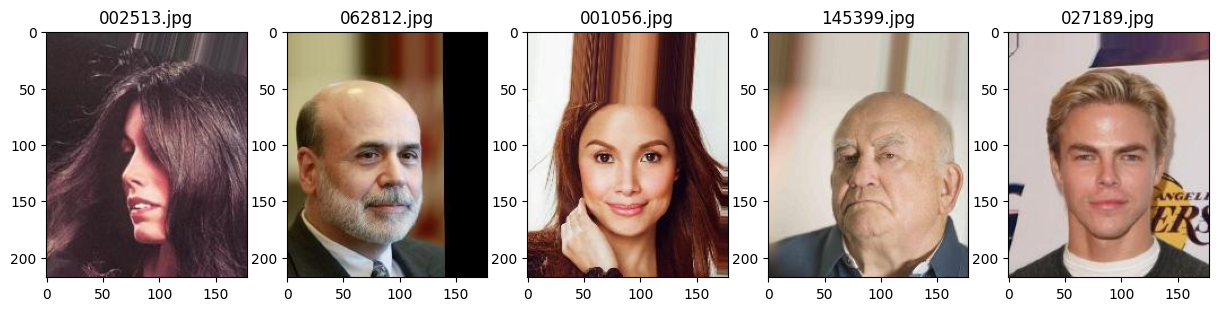

In [34]:
images_names = os.listdir('./celebA_train_500/celebA_imgs/')[:5]
show_imgs(images_names)

### Train Neural Network

Давайте создадим наборы данных и сеть, используя эти изображения:

In [35]:
transform_train = transforms.Compose([
      # трансформируем наши фото для обучения
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      # transforms.Resize(size=(224, 224)),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      # трансформируем наши фото для валидации
      transforms.CenterCrop(size=120),
      # transforms.Resize(size=(224, 224)),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# зададим размер банча и сделаем даталоадеры
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


**Рабочий процесс**: обучим модель на train_data, используя val_data для проверки. Используем стандартную функцию потерь CE. Рассчитаем потери и точность на тестовом наборе после обучения.

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [90]:
model = timm.create_model('efficientnet_b3a', pretrained=True)

In [36]:
person = pd.read_csv('celebA_train_500/celebA_anno.txt', sep = ' ', names = ['file', 'label'])

In [37]:
n_classes = len(person['label'].unique())

In [40]:
clear_ram()

Не ставлю задачей получения максимального скора, поэтому меняю модель на менее требовательную

In [91]:
classifier = model.classifier
model.classifier = nn.Sequential(
    nn.Linear(1536, 1000),
    nn.BatchNorm1d(1000),
    nn.Linear(1000, n_classes))
model.to(device)
print("we will classify :{}".format(n_classes))

we will classify :500


In [42]:
clear_ram()

In [92]:
optimizer = Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [44]:
model, history = train(
    train_loader,
    val_loader,
    model = model,
    epochs = 20,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = nn.CrossEntropyLoss()
)

epoch: 100%|████████████████████████████████████| 20/20 [23:20<00:00, 70.01s/it]

Best val Acc: 0.830138


In [45]:
results = pd.DataFrame({'model': ['CE_20'], 'train_accuracy': [float(history[-1][2])]})
results

,model,train_accuracy
0,CE_20,0.987711


In [46]:
torch.save(model.state_dict(), 'model_CE_50.pth')

In [47]:
model.to(device)
model.load_state_dict(torch.load('model_CE_50.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [48]:
epoch, loss, acc, val_loss, val_acc = zip(*history)

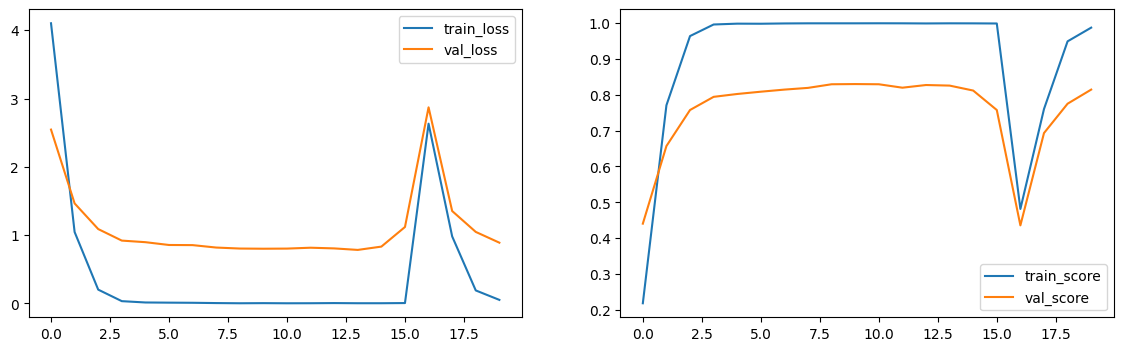

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [50]:
clear_output(wait=True)

Код для оценки модели (вы можете изменить его, если хотите):

In [51]:
test_accuracy, test_loss = evaluate(model, test_loader, nn.CrossEntropyLoss())
test_accuracy, test_loss

Test images: 25it [00:06,  3.89it/s]


(array(0.8061674, dtype=float32), np.float64(0.8965666961669921))

In [52]:
results['test_accuracy'] = float(test_accuracy)
results

,model,train_accuracy,test_accuracy
0,CE_20,0.987711,0.806167


In [53]:
results.to_csv('results.csv')

Как можно заметить модель адекватно реагирует на обучение и не переобучается. Для получения более высокого скора возможно перейти к более тяжелой модели.

**Вычисление косинусного сходства**: удалим последний слой обученной сети. Получим эмбеддинги для некоторых изображений из train и для изображений из test. Вычислим косинусное сходство между эмбеддингами, соответствующими изображениям одного и того же человека и разных людей.

Отбросим у нашей сетки последний слой

In [93]:
classifier = model.classifier
model.classifier = nn.Linear(1536, 1000)
model.to(device)
print("we will classify :{}".format(n_classes))

we will classify :500


In [55]:
clear_ram()

Сделаем себе словарик с метками и именами файлов картинок

In [87]:
test_class_idx_map = defaultdict(list)
for i, batch in enumerate(test_data):
    X_batch, y_batch = batch['image'], batch['label']
    test_class_idx_map[y_batch].append(i)
    
train_class_idx_map = defaultdict(list)
for i, batch in enumerate(train_data):
    X_batch, y_batch = batch['image'], batch['label']
    train_class_idx_map[y_batch].append(i)

Посчитаем влет косинусные расстояния для фото одного человека и разных людей

In [94]:
test_embs = 0
train_embs = 0
train_embs_cache = {}
same_persons = torch.FloatTensor([0])
diff_persons = torch.FloatTensor([0])

for test_cl, test_idxs in tqdm(test_class_idx_map.items(), desc='Test images'):

    imgs = torch.vstack([test_data[i]['image'][None, :] for i in test_idxs])
    test_embs = get_embeddings(model, imgs)
        
    for train_cl, train_idxs in train_class_idx_map.items():

        if train_cl in train_embs_cache:
            train_embs = train_embs_cache[train_cl]
        else:
            imgs = torch.vstack([train_data[i]['image'][None, :] for i in train_idxs])
            train_embs = get_embeddings(model, imgs)
            train_embs_cache[train_cl] = train_embs
        
        pcs = pairwise_cosine_similarity(test_embs, train_embs).flatten()
        if train_cl == test_cl:
            same_persons = torch.hstack((same_persons, pcs))
        else:
            diff_persons = torch.hstack((diff_persons, pcs))

Test images: 100%|████████████████████████████| 491/491 [04:16<00:00,  1.92it/s]


Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

In [95]:
clear_output(wait=True)

In [58]:
with open('same_persons', 'wb') as f:
    pickle.dump(same_persons, f)
with open('diff_persons', 'wb') as f:
    pickle.dump(diff_persons, f)

In [59]:
with open('same_persons', 'rb') as f:
    same_persons = pickle.load(f)
with open('diff_persons', 'rb') as f:
    diff_persons = pickle.load(f)

In [60]:
np.array(same_persons).mean()

np.float32(0.6032999)

С фото одинаковых людей косинусное подобие в среднем 0.6032999

In [61]:
np.array(diff_persons).mean()

np.float32(0.320409)

С фотографиями разных людей оно в среднем 0.320409

**Cosine similarity distribution**: рассчитаем все косинусные сходства между изображениями в test dataset и train dataset одного и того же человека. Это означает, что если у нас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами этого человека из train dataset. 

Затем также сделаем это для пар разных людей. Это означает, что если у вас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами отличного от него человека из train dataset.

Визуализируем (построим гистограммы) распределения косинусного сходства для одних и тех же и разных людей.

Этот расчет может занять много времени и памяти, так как это много пар. Мы сократим количество пар, между которыми рассчитаем расстояния до 1000.

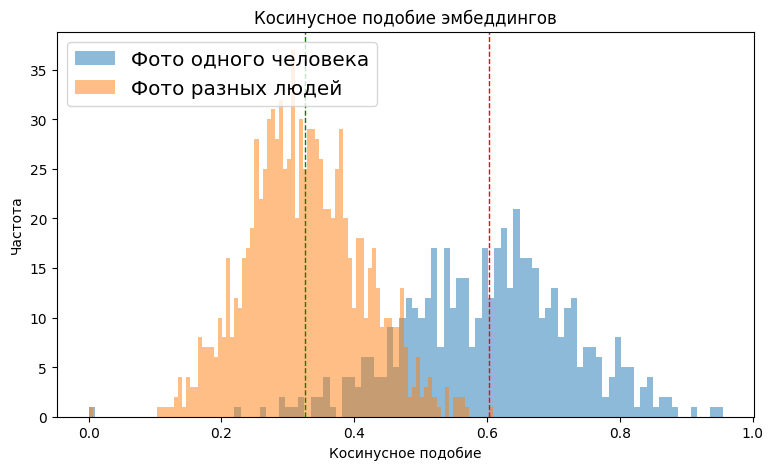

In [62]:
plt.figure (figsize = [9, 5])
    
plt.hist (np.array(same_persons)[:1000], bins=100, label = 'Фото одного человека', alpha=.5)
plt.hist (np.array(diff_persons)[:1000], bins=100, label = 'Фото разных людей', alpha=.5)

plt.axvline(np.array(same_persons)[:1000].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(np.array(diff_persons)[:1000].mean(), color='g', linestyle='dashed', linewidth=1)


plt.xlabel ('Косинусное подобие')
plt.ylabel ('Частота')

plt.legend (loc = 'upper left', fontsize = 'x-large')

plt.title ('Косинусное подобие эмбеддингов')
plt.show ()

На гистограммах видим, что распределения косинусного подобия фотографий для одного человека и для нескольких близки к нормальным. Отмечается среднее по распределению у разных людей ближе к 0.320409, а у одного человека к 0.6032999

## Часть 2: Identificaton rate metric

При обучении приведенной выше модели мы использовали потери CE на val and test датасетах в качестве меры производительности нашей модели. Но у этого есть большой недостаток: мы не можем измерить, как модель будет работать на невидимых лицах (которые не присутствовали в train, val и test датасетах)

Чтобы решить эту проблему, мы можем рассчитать другую метрику для модели: **identification rate**. Вот как это работает:

У нас есть два датасета с лицами: query and distractors. Ни одно из них не было в train, val или test датасетах.

1. расчитаем cosine similarities между всеми лицами соответствующим одному человеку из query dataset. Это означает, что если у нас есть 3 фото из query части: 01.jpg, 02.jpg, 03.jpg, мы расчитаем 3 cosine similarities между всеми эмбеддингами этих фото. 
2. расчитаем cosine similarities между всеми эмбеддингами разных людей из query dataset. 
3. расчитаем cosine similarities между всеми парами эмбеддингов, соответствующих query and distractors. Это означает, что нам необходимо посчитать подобия между (q, d), где q это эмбеддинг из query, d — эмбеддинг из distractors. Нам надо |query|*|distractors| подобие.
4. Просуммируем число подобий из 2 и 3 пунктов. Это будет числом false pairs.
5. посчитаем **FPR** (false positive rate). Пусть будет равен 0.01 в нашем случае. FPR, умноженный на количество false pairs из пункта 4 это число - false positives, которое мы позволяем нашей модели для ложных срабатываний. Назовем это числом N
6. Отсортируем все подобия из false pairs по возрастанию. Возьмем N-ый элемент с начала — это наш **threshold similarity**.
7. Посчитаем сколько положительных срабатываний из пункта 1 превышает threshold. Разделим это число на число положительных подобий из пункта 1. Это - TPR (true positive rate) — наша метрика.

Этот показатель также может быть выражен как TPR@FPR=0.01. FPR может быть установлен разным. 

Данные (query photos, query labels & distructors photos) можно загрузить отсюда:

**Пример**: внедрим метрику TPR@FPR. Посчтитаем ее для нашей модели на test датасете при FPR=[0.5, 0.2, 0.1, 0.05].

In [97]:
f = open('./celebA_ir/celebA_anno_query.csv', 'r')
query_lines = f.readlines()[1:]
f.close()
query_lines = [x.strip().split(',') for x in query_lines]
# Простой список названий изображений из запроса. Необходимо вычислить вложения для запроса
query_img_names = [x[0] for x in query_lines]

# Словарь с информацией о том, какие изображения из запроса относятся к какому классу
# формат:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
    query_dict[img_class].append(img_name)

# Список изображений диктатора
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

In [98]:
test_dict, test_img_names = type_embeddings('test')

In [65]:
with open('test_dict.pkl', 'wb') as f:
    pickle.dump(test_dict, f)
with open("test_img_names", 'wb') as f:   #Pickling
    pickle.dump(test_img_names, f)

In [66]:
with open('test_dict.pkl', 'rb') as f:
    test_dict = pickle.load(f)
with open('test_img_names', 'rb') as f:
    test_img_names = pickle.load(f)

In [67]:
clear_ram()

In [68]:
path = './celebA_train_500/celebA_imgs/'
test_embeddings = compute_embeddings(model, test_img_names, path)
with open("test_embeddings", 'wb') as f:   #Pickling
    pickle.dump(test_embeddings, f)

Get embeddings: 25it [00:02,  9.72it/s]


In [69]:
clear_ram()

In [70]:
with open('test_embeddings', 'rb') as f:
    test_embeddings = pickle.load(f)

In [99]:
path = './celebA_ir/celebA_query/'
query_embeddings = compute_embeddings(model, query_img_names, path)

torch.cuda.empty_cache()
gc.collect()

path = './celebA_ir/celebA_distractors/'
distractors_embeddings = compute_embeddings(model, distractors_img_names, path)

clear_ram()

Get embeddings: 39it [00:02, 15.25it/s]
Get embeddings: 63it [00:04, 15.34it/s]


In [100]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings)
with open("cosine_query_pos", 'wb') as f:
    pickle.dump(cosine_query_pos, f)

Progress: 100%|█████████████████████████████████| 51/51 [00:03<00:00, 13.25it/s]


distractors_embeddings:  17%|██▎           | 332/2001 [00:00<00:00, 3319.01it/s]


distractors_embeddings:  83%|██████████▊  | 1660/2001 [00:00<00:00, 2787.06it/s]


distractors_embeddings:  14%|█▉            | 276/2001 [00:00<00:00, 2758.19it/s]


distractors_embeddings:  18%|██▌           | 370/2001 [00:00<00:00, 3692.78it/s]


query_embeddings:  22%|████▊                 | 267/1222 [02:39<08:44,  1.82it/s]


distractors_embeddings:  54%|███████      | 1088/2001 [00:00<00:00, 3565.05it/s]


distractors_embeddings:  19%|██▌           | 372/2001 [00:00<00:00, 3715.57it/s]


query_embeddings:  29%|██████▎               | 350/1222 [03:26<08:01,  1.81it/s]


distractors_embeddings:  74%|█████████▋   | 1484/2001 [00:00<00:00, 3667.45it/s]


distractors_embeddings:  38%|█████▎        | 756/2001 [00:00<00:00, 3715.21it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  90%|███████████▋ | 1807/2001 [00:00<00:00, 2991.80it/s]


distractors_embeddings:  53%|██████▊      | 1054/2001 [00:00<00:00, 3501.75it/s]


distractors_embeddings:  37%|█████▏        | 742/2001 [00:00<00:00, 3551.87it/s]


distractors_embeddings:  69%|████████▉    | 1385/2001 [00:00<00:00, 3471.35it/s]


distractors_embeddings:  83%|██████████▊  | 1668/2001 [00:00<00:00, 2804.32it/s]


distractors_embeddings:  86%|███████████▏ | 1715/2001 [00:00<00:00, 3441.85it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3594.13it/s]


distractors_embeddings:  18%|██▍           | 357/2001 [00:00<00:00, 3560.49it/s]


query_embeddings:  55%|████████████          | 670/1222 [06:39<05:29,  1.67it/s]


distractors_embeddings:  85%|███████████  | 1699/2001 [00:00<00:00, 2824.75it/s]


distractors_embeddings:  71%|█████████▏   | 1414/2001 [00:00<00:00, 3515.09it/s]


distractors_embeddings:  41%|█████▋        | 820/2001 [00:00<00:00, 2629.23it/s]


distractors_embeddings:  54%|███████      | 1080/2001 [00:00<00:00, 3529.62it/s]


distractors_embeddings:  13%|█▊            | 257/2001 [00:00<00:00, 2569.71it/s]


distractors_embeddings:  54%|███████      | 1085/2001 [00:00<00:00, 3501.53it/s]


distractors_embeddings:  72%|█████████▎   | 1437/2001 [00:00<00:00, 3487.19it/s]


distractors_embeddings:  18%|██▍           | 352/2001 [00:00<00:00, 3512.78it/s]


distractors_embeddings:  75%|█████████▋   | 1493/2001 [00:00<00:00, 3165.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  36%|█████         | 724/2001 [00:00<00:00, 3527.13it/s]


distractors_embeddings:  90%|███████████▊ | 1809/2001 [00:00<00:00, 3180.16it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  14%|█▉            | 277/2001 [00:00<00:00, 2764.05it/s]


query_embeddings:  87%|██████████████████▎  | 1063/1222 [10:47<01:34,  1.68it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3595.95it/s]


distractors_embeddings:  73%|█████████▍   | 1452/2001 [00:00<00:00, 3399.85it/s]


distractors_embeddings:  74%|█████████▋   | 1487/2001 [00:00<00:00, 3625.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


query_embeddings:  98%|████████████████████▌| 1197/1222 [12:07<00:15,  1.58it/s]


query_embeddings: 100%|█████████████████████| 1222/1222 [12:23<00:00,  1.64it/s]


In [101]:
clear_output(wait=True)

In [73]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings)
with open("cosine_query_neg", 'wb') as f:
    pickle.dump(cosine_query_neg, f)

Subset: 100%|███████████████████████████████| 1275/1275 [03:11<00:00,  6.67it/s]


In [74]:
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)
with open("cosine_query_distractors", 'wb') as f:
    pickle.dump(cosine_query_distractors, f)

query_embeddings: 100%|█████████████████████| 1222/1222 [09:47<00:00,  2.08it/s]


In [75]:
with open('cosine_query_pos', 'rb') as f:
    cosine_query_pos = pickle.load(f)
with open('cosine_query_neg', 'rb') as f:
    cosine_query_neg = pickle.load(f)
with open('cosine_query_distractors', 'rb') as f:
    cosine_query_distractors = pickle.load(f)

Проверим себя:

In [76]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

query_embeddings: 100%|█████████████████████████| 6/6 [00:00<00:00, 2548.44it/s]


In [77]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

В итоге:: identification rate calculation

Проверка:

In [78]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
    x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
    test_thr.append(x)
    test_tpr.append(y)

In [79]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

В итоге, посчитаем tpr для лиц из query и distractors датасетов при fpr = [0.5, 0.2, 0.1, 0.05]:

In [80]:
thr = []
tpr = []
for fpr in [0.5, 0.2, 0.1, 0.05]:
    x, y = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    thr.append(x)
    tpr.append(y)

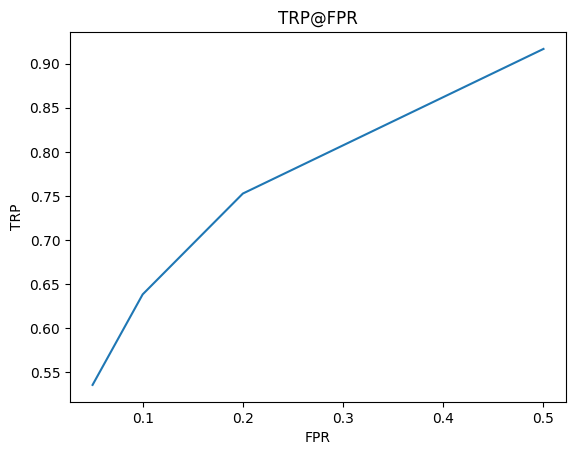

In [81]:
fpr = [0.5, 0.2, 0.1, 0.05]
plt.plot(fpr, tpr)

plt.xlabel ('FPR')
plt.ylabel ('TRP')

plt.title ('TRP@FPR')
plt.show ()

Ну так себе...

## Часть 3: Loss functions

При построении сети на примере 1 мы использовали обычные потери CE. Но есть еще много вариантов функций потерь, которые можно использовать для обучения нейронной сети. Мы обсудим два из них, которые являются наиболее популярными. Больше примеров потерь для распознавания лиц и обзоры их производительности вы можете найти в этой статье:https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss

Это еще один вид потерь, который не требует наличия у модели последнего слоя классификации — он работает напрямую с эмбеддингами. Он требует, чтобы эмбеддинги одного человека были близки на пространстве эмбеддингов, а эмбеддинги разных людей были далеко друг от друга.

Эта функция имеет преимущество перед потерями, подобными CE: она не зависит от количества классов в датасете. Если у нас есть новые лица новых людей в датасете, нам не нужно будет полностью переобучать сеть, мы можем просто настроить обученную сеть на новых фотографиях.

**Как TripletLoss работает**:

Здесь архитектура нейронной сети будет немного отличаться от той, что была при использовании потери CE: в ней не будет последнего слоя классификации. Последний слой NN будет выводить эмбеддинги данной фотографии.

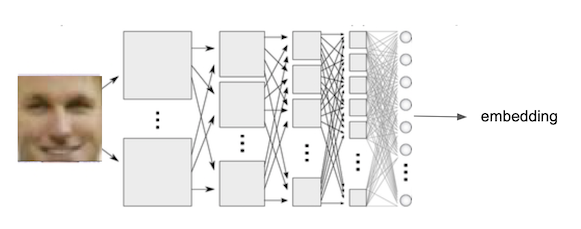

Функция TripletLoss работает напрямую с этими вложениями. Идея состоит в том, чтобы сделать вложения одних и тех же людей более близкими, компактными в пространстве вложений, а вложения разных людей более отдельными. Есть формула потери:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

гже
- $e$ эмбеддинг фото (output of a model)
- $p$ позитивный эмбеддинг для фото (эмбеддинг $e$ должен быть близок)
- $n$ негативный эмбеддинг для фото (эмбеддинг $e$ должен быть далек)
- $d(x, y)$ расстояние между эмбеддингами
- margin — позитивный margin для еще большего увеличения разницы мужду $d(a, p)$ и $d(a, n)$

**Все эмбеддинги $e$, $p$ и $n$ должны быть нормализованы для передачи в функцию потерь**.

В нашем случае для данной фотографии $E$ и ее эмбеддингом $e$ положительный эмбеддинг $p$ должен быть эмбеддингом фотографии того же человека, а эмбеддинг $n$ должен быть эмбеддингом фотографии другого человека.

Про TripletLoss for PyTorch можно прочесть [тут](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). Существуют различные варианты TripletLoss, которые также могут повысить производительность и которые вы можете реализовать самостоятельно, если хотите:
- uиспользовать больше одного варианта $p$ и $n$ для одного эмбеддинга $e$ 
- использовать специальные негативные эмбеддинги: т.е. negatives, которые очень близко к e (для усиления отношения отдаления от e)


**Больше прочитать про TripletLoss**:

Как идея TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch пример TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Пример**: обучим модель на функции потерь TripletLoss.

In [38]:
transform_train = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [39]:
train_data = TripletDataset('train', transform_train)
val_data = TripletDataset('val', transform)
test_data = TripletDataset('test', transform)

batch_size = 16

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [40]:
clear_ram()

In [41]:
model_efficientnet = timm.create_model('efficientnet_b3a', pretrained=True)

In [42]:
clear_ram()

In [43]:
model_efficientnet.classifier = nn.Sequential(
    nn.Linear(1536, 256),
    nn.BatchNorm1d(256)
)
embeddingNetwork = model_efficientnet

In [44]:
classifierNetwork = classifierNet(embeddingNetwork).to(device)

In [45]:
clear_ram()

In [46]:
optimizer = Adam(classifierNetwork.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [47]:
distance_function=l_infinity
margin=1.5
swap=True

loss_fn = custom_loss(distance_function, margin, swap)

In [48]:
model, history = train_TripletLoss(
    train_data,
    val_data,
    model = classifierNetwork,
    epochs = 20,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch: 100%|█████████████████████████████████| 20/20 [1:13:33<00:00, 220.67s/it]

Best val Loss: 0.793397


In [57]:
results = pd.read_csv('results.csv')

In [58]:
results.loc[1] = [1, 'TripletLoss_20', float(history[-1][3]), 0]
results

,Unnamed: 0,model,train_accuracy,test_accuracy
0,0,CE_20,0.987711,0.806167
1,1,TripletLoss_20,0.964888,0.000000


In [59]:
torch.save(model.state_dict(), 'model_TripletLoss_50_.pth')

In [60]:
model = classifierNetwork

In [61]:
model.to(device)
model.load_state_dict(torch.load('model_TripletLoss_50_.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [62]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

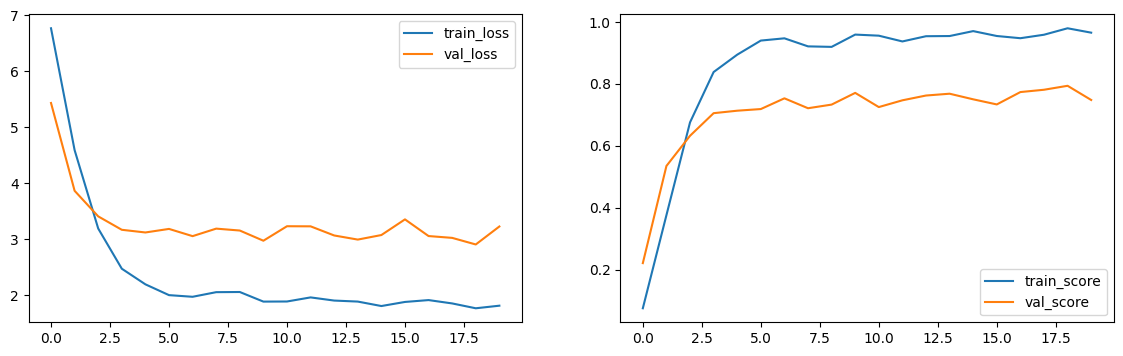

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [64]:
test_accuracy, test_loss = evaluate_TripletLoss(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.75267464, dtype=float32), np.float64(3.306352788209915))

In [65]:
results['test_accuracy'][1] = float(test_accuracy)
results

,Unnamed: 0,model,train_accuracy,test_accuracy
0,0,CE_20,0.987711,0.806167
1,1,TripletLoss_20,0.964888,0.752675


In [76]:
results.to_csv('results.csv')

In [66]:
clear_ram()

С данной метрикой лосса модель показала результат в 0.752675.

### ArcFace Loss (Additive Angular Margin Loss)

Этот лосс является чем-то вроде "SOTA" для систем распознавания лиц (в чем-то — потому что на самом деле разные варианты потерь и их комбинации могут быть оптимальными для разных сетевых архитектур). Эта потеря наследует идею потери CE, но развивает ее для достижения лучшего распределения вложений на сфере. Он вводит некоторые геодезические ограничения для повышения компактности внутри класса и несоответствия между классами.

**Как работает ArcFace loss**:

Этот лосс является разновидностью стандартного лосса SoftMax CE, который заставляет эмбеддинги разных классов (людей) быть дальше: иметь более разреженное представление эмбеддингов в пространстве эмбеддингов, обеспечивать более очевидный разрыв между ближайшими классами.

Стандартный SoftMax CE loss для задачи классификации выглядит так:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

где:
- $x_i \in \mathbb{R^d}$ обозначает глубокий признак $i$-го образца, принадлежащего $y_i$-му классу;
- $W_j \in \mathbb{R^d}$ обозначает j-й столбец веса;
- $W \in \mathbb{R^d}$ и $b_j \in \mathbb{R^d}$ это смещение (bias);
- $N$ — размер batch'а;
- $n$ — номер класса.

Похоже, что, хотя эта потеря работает хорошо, она явно не оптимизирует встраивание признаков, чтобы обеспечить более высокое сходство для внутриклассовых выборок и разнообразие для межклассовых выборок, что приводит к разрыву в производительности для глубокого распознавания лиц при больших внутриклассовых выборках. вариации внешнего вида класса.

Давайте немного поработаем над этой формулой потерь:
- приравняем bias $b_j=0$;
- нормализуем веса ||$W_j$|| = 1;
- номализуем эмбеддинги ||$x_i$|| = 1 и маштабируем его до s (s это гиперпараметр)

Шаг нормализации эмбеддингов и весов делает предсказания зависящими только от угла между вложением и весом. Таким образом, изученные вложения распределяются по гиперсфере радиусом s.

Тогда наша loss function будет:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Последний шаг: давайте добавим аддитивный штраф за угловой запас $m$ между $x_i$ и $W_{y_i}$, чтобы одновременно повысить компактность внутри класса и несоответствие между классами:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Вот наша ArcFace loss. И мы можем играться с 2 гиперпараметрами: s и m.

В оригинале почитать о ArcFace: https://arxiv.org/pdf/1801.07698.pdf

Оригинальный репозиторий с примером: https://github.com/deepinsight/insightface

**Пример**: обучим нашу модель с использованием функции потерь - ArcFace loss.

In [67]:
transform_train = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(330, 330)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(330, 330)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [68]:
model_efficientnet = timm.create_model('efficientnet_b3a', pretrained=True)

In [70]:
model_efficientnet.classifier = nn.Sequential(
    nn.Linear(1536, 256),
    nn.BatchNorm1d(256)
)
embeddingNetwork = model_efficientnet

In [71]:
classifierNetWork_ArcFace = classifierNet_ArcFace(embeddingNetwork).to(device)

In [72]:
optimizer = Adam(classifierNetWork_ArcFace.parameters(), lr=1e-3, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [73]:
clear_ram()

In [74]:
n_classes = n_classes
embedding_size = 256
margin = 28.6
scale = 64

loss_fn = custom_loss_ArcFace(n_classes, embedding_size, margin, scale)

In [75]:
model, history = train_ArcFace(
    train_data,
    val_data,
    model = classifierNetWork_ArcFace,
    epochs = 20,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch: 100%|████████████████████████████████████| 20/20 [21:25<00:00, 64.27s/it]

Best val Loss: 0.817891


In [77]:
results.loc[2] = [2, 'ArcFace_20', float(history[-1][3]), 0]
results

,Unnamed: 0,model,train_accuracy,test_accuracy
0,0,CE_20,0.987711,0.806167
1,1,TripletLoss_20,0.964888,0.752675
2,2,ArcFace_20,0.994382,0.000000


In [78]:
torch.save(model.state_dict(), 'model_ArcFace_50.pth')

In [79]:
model.to(device)
model.load_state_dict(torch.load('model_ArcFace_50.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [80]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

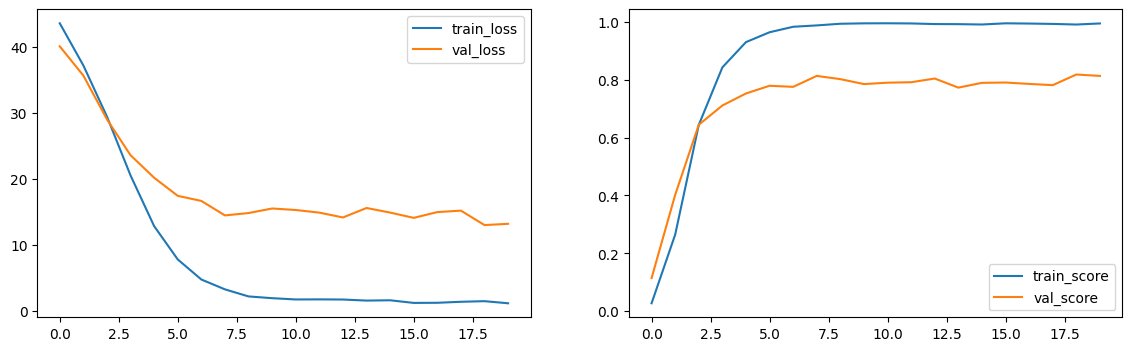

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [82]:
test_accuracy, test_loss = evaluate_ArcFace(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.81938326, dtype=float32), np.float64(13.135490989685058))

In [83]:
results['test_accuracy'][2] = float(test_accuracy)
results

,Unnamed: 0,model,train_accuracy,test_accuracy
0,0,CE_20,0.987711,0.806167
1,1,TripletLoss_20,0.964888,0.752675
2,2,ArcFace_20,0.994382,0.819383


In [84]:
results.to_csv('results.csv')

In [85]:
clear_ram()

С данной метрикой лосса модель показала результат в 0.819383, что уже неплохо.

### Выводы

Метрика ArcFace показала лучшие результаты из исследуемых. Следует продолжить исследования с подбором еще метрик либо с подпором гиперпараметров используемой модели либо подобрать модель более тежелую, т.е. по тестам данная модель не переобучается.